Loading dataset...
Dataset loaded successfully.
Target distribution:
target
0.0    789400
1.0     10600
Name: count, dtype: int64
Extracting positive and negative samples...
Samples extracted successfully.
Balancing the dataset by upsampling the minority class...
Dataset balanced successfully.
Splitting dataset into features and target variable...
Dataset split successfully.
Splitting data into training and test sets...
Data split successfully.
y_train distribution:
target
1.0    8498
0.0    8462
Name: count, dtype: int64
Training the Decision Tree model...
Model trained successfully.
Predicting probabilities for unknown users...
Probabilities predicted successfully.
Determining potential 5G users with threshold...
Potential 5G users determined successfully.
Saving prediction results to Excel file...
Prediction results saved to predicted_results_decision_tree.xlsx
Evaluating model performance on the test set...
Classification report on test set:
               precision    recall  f1-s

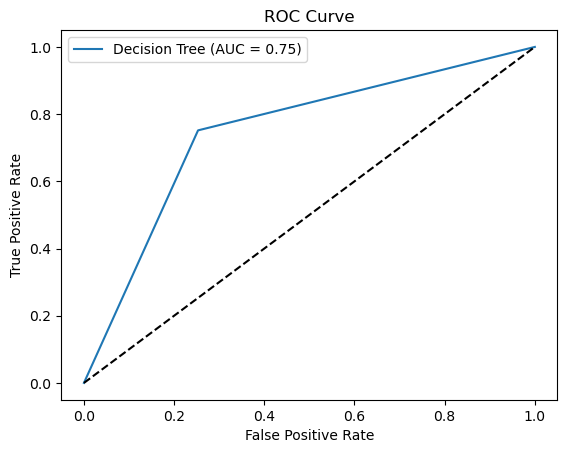

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import time
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Step 1: Load the dataset
print("Loading dataset...")
data = pd.read_csv('train.csv')
print("Dataset loaded successfully.")

# Step 2: Check the distribution of the target variable
print("Target distribution:")
print(data['target'].value_counts())

# Step 3: Extract positive and negative samples
print("Extracting positive and negative samples...")
positive_samples = data[data['target'] == 1]
negative_samples = data[data['target'] == 0]
print("Samples extracted successfully.")

# Step 4: Balance the dataset by upsampling the minority class
print("Balancing the dataset by upsampling the minority class...")
minority_class = positive_samples
majority_class = negative_samples.sample(n=len(positive_samples), replace=True, random_state=42)
balanced_data = pd.concat([majority_class, minority_class])
print("Dataset balanced successfully.")

# Step 5: Split the dataset into features (X) and target variable (y)
print("Splitting dataset into features and target variable...")
X = balanced_data.drop(['id', 'target'], axis=1)
y = balanced_data['target']
print("Dataset split successfully.")

# Step 6: Split the data into training and test sets
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split successfully.")

# Step 7: Check the distribution of y_train again
print("y_train distribution:")
print(y_train.value_counts())

# Step 8: Train the Decision Tree classifier
print("Training the Decision Tree model...")
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")

# Step 9: Predict probabilities for unknown users
print("Predicting probabilities for unknown users...")
unknown_users = data[data['target'] == 0].drop(['id', 'target'], axis=1)
predicted_probabilities = model.predict_proba(unknown_users)[:, 1]
print("Probabilities predicted successfully.")

# Step 10: Determine potential 5G users with a threshold
print("Determining potential 5G users with threshold...")
threshold = 0.5  # This threshold can be adjusted
predicted_labels = (predicted_probabilities > threshold).astype(int)
print("Potential 5G users determined successfully.")

# Step 11: Output results
print("Saving prediction results to Excel file...")
results = pd.DataFrame({
    'id': data[data['target'] == 0]['id'],
    'predicted_target': predicted_labels
})
results.to_excel('predicted_results_decision_tree.xlsx', index=False)
print("Prediction results saved to predicted_results_decision_tree.xlsx")

# Step 12: Evaluate the model's performance on the test set
print("Evaluating model performance on the test set...")
y_test_pred_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob > threshold).astype(int)
print("Classification report on test set:\n", classification_report(y_test, y_test_pred))
auc_score = roc_auc_score(y_test, y_test_pred_prob)
print("AUC score on test set:", auc_score)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Plot the ROC curve
print("Plotting ROC curve...")
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

